In [88]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [5]:
df.shape

(1991, 3)

In [9]:
df['DATE'].count()

1991

In [17]:
df['DATE'].value_counts()

2015-11-01 00:00:00    14
2012-12-01 00:00:00    14
2011-04-01 00:00:00    14
2014-06-01 00:00:00    14
2015-08-01 00:00:00    14
                       ..
2008-09-01 00:00:00    12
2008-12-01 00:00:00    12
2008-08-01 00:00:00    11
2008-10-01 00:00:00    11
2008-07-01 00:00:00     1
Name: DATE, Length: 145, dtype: int64

In [18]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [20]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [52]:
groupby_tag = df.groupby('TAG').count()
groupby_tag

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [56]:
groupby_tag_sum = df.groupby('TAG').sum()
print(f"Total number of Posts as per the programming Languages are:\n{groupby_tag_sum}")

Total number of Posts as per the programming Languages are:
              POSTS
TAG                
assembly      34852
c            336042
c#          1423530
c++          684210
delphi        46212
go            47499
java        1696403
javascript  2056510
perl          65286
php         1361988
python      1496210
r            356799
ruby         214582
swift        273055


In [62]:
print(f"{groupby_tag_sum['POSTS'].idxmax()}")

javascript


In [63]:
print(f"{groupby_tag_sum['POSTS'].idxmin()}")

assembly


In [50]:
groupby_date = df.groupby('DATE').count()
print(f'{groupby_date.head()}\n{groupby_date.tail()}')

                     TAG  POSTS
DATE                           
2008-07-01 00:00:00    1      1
2008-08-01 00:00:00   11     11
2008-09-01 00:00:00   12     12
2008-10-01 00:00:00   11     11
2008-11-01 00:00:00   12     12
                     TAG  POSTS
DATE                           
2020-03-01 00:00:00   14     14
2020-04-01 00:00:00   14     14
2020-05-01 00:00:00   14     14
2020-06-01 00:00:00   14     14
2020-07-01 00:00:00   14     14


In [51]:
groupby_date['POSTS'].idxmax()

'2009-11-01 00:00:00'

In [ ]:
#Data Cleaning: Working with Time Stamps

In [66]:
type(df.DATE[1])

str

In [67]:
df.DATE[1]

'2008-08-01 00:00:00'

In [68]:
df.DATE = pd.to_datetime(df.DATE)

In [69]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [71]:
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [72]:
#Data Manipulation: Pivoting DataFrames

In [83]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
print(f"Head:\n{reshaped_df.head()}\nTail:\n{reshaped_df.tail()}")

Head:
TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   85.0   511.0  164.0    14.0 NaN   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0 NaN  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0 NaN  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0 NaN   958.0       579.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  161.0   124.0  NaN   73.0    NaN  
2008-09-01  131.0  482.0   542.0  6.0  290.0    NaN  
2008-10-01  127.0  617.0   510.0  NaN  249.0    NaN  
2008-11-01   97.0  504.0   452.0  1.0  160.0    NaN  
Tail:
TAG         assembly       c       c#     c++  delphi     go   

In [81]:
reshaped_df.shape

(145, 14)

In [82]:
df.shape

(1991, 3)

In [84]:
reshaped_df.fillna(0, inplace=True)

In [135]:
reshaped_df.head(15)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
2008-12-01,18.0,186.0,1597.0,633.0,134.0,0.0,832.0,627.0,134.0,481.0,441.0,1.0,161.0,0.0
2009-01-01,22.0,321.0,2378.0,853.0,164.0,0.0,1150.0,792.0,147.0,636.0,631.0,8.0,209.0,1.0
2009-02-01,37.0,332.0,2599.0,845.0,168.0,0.0,1208.0,948.0,165.0,769.0,630.0,9.0,287.0,1.0
2009-03-01,24.0,430.0,3162.0,1056.0,162.0,0.0,1440.0,1005.0,139.0,904.0,765.0,4.0,330.0,1.0


In [86]:
reshaped_df.isna().values.any()

False

In [87]:
#Data Visualisation with Matplotlib

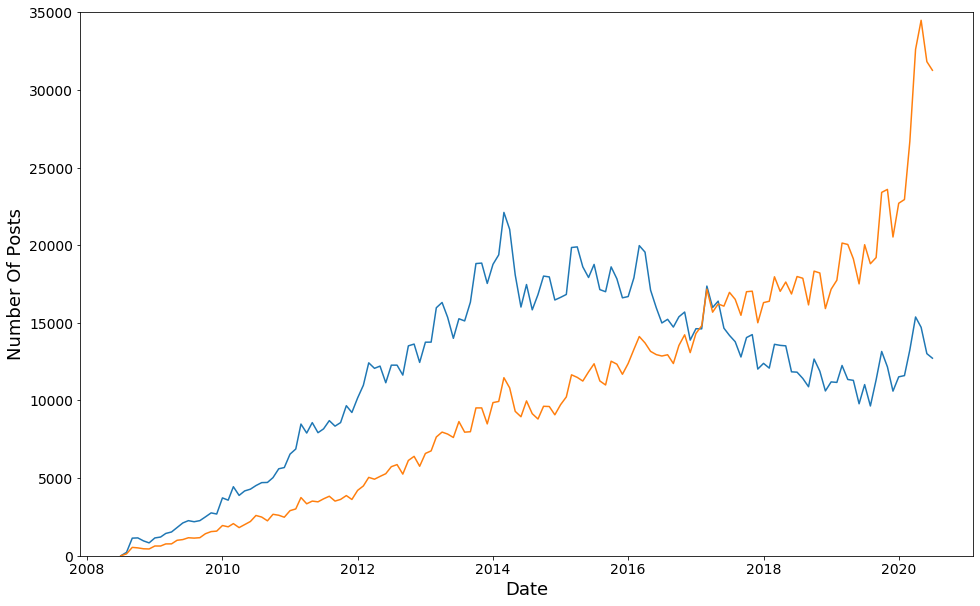

In [123]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number Of Posts', fontsize=18)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'], reshaped_df.index, reshaped_df['python'])

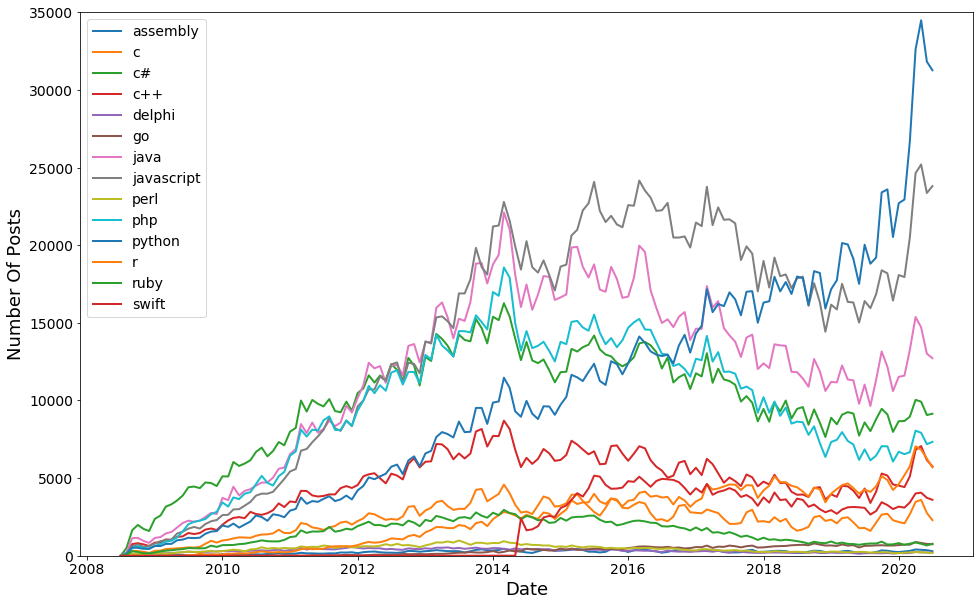

In [127]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number Of Posts', fontsize=18)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name, linewidth=2)
    
plt.legend(fontsize=14)

In [128]:
#Smoothing out Time-Series Data

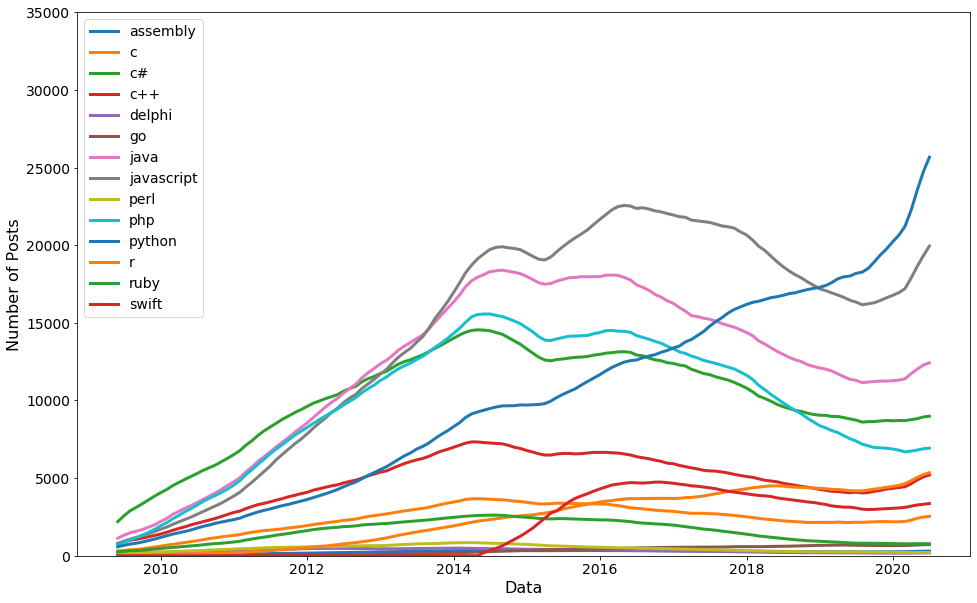

In [134]:
roll_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=14)